## Exploratory data analysis

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df1 = pd.read_csv("./output/merged_dataset_method1.csv")
df2 = pd.read_csv("./output/merged_dataset_method2.csv")
df1_attack = pd.read_csv("./output/merged_attack_dataset_method1.csv")
df2_attack = pd.read_csv("./output/merged_attack_dataset_method2.csv")
save_directory = "./output/plots/exploratory_analysis/"

Method 1

In [2]:
method_name = "method1"

Benign/malicious distribution

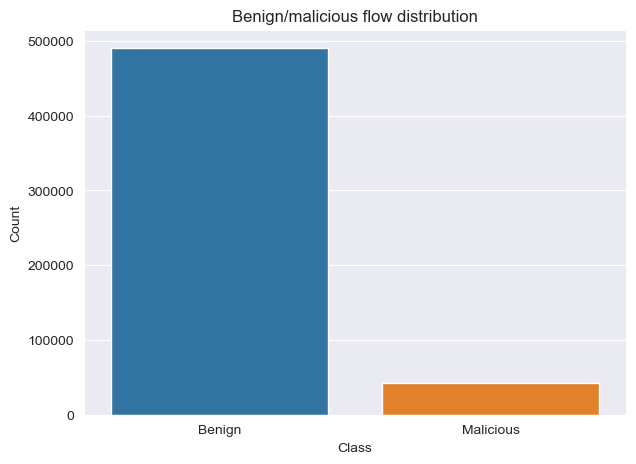

In [3]:
# Count occurrences of each class value
# class_counts = df1['class'].value_counts()
# plt.bar(range(len(class_counts)), class_counts.values, tick_label=class_counts.index)
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='class', data=df1, order = df1['class'].value_counts().index, ax=ax)
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Benign/malicious flow distribution')
plt.xticks([0, 1], ['Benign', 'Malicious'])

plt.savefig(save_directory + method_name + "_class_distribution.png")

plt.show()

Undersampling benign flows

Class distribution before undersampling:
class
0    490326
1     42900
Name: count, dtype: int64
Class distribution after undersampling:
class
0    49033
1    42900
Name: count, dtype: int64


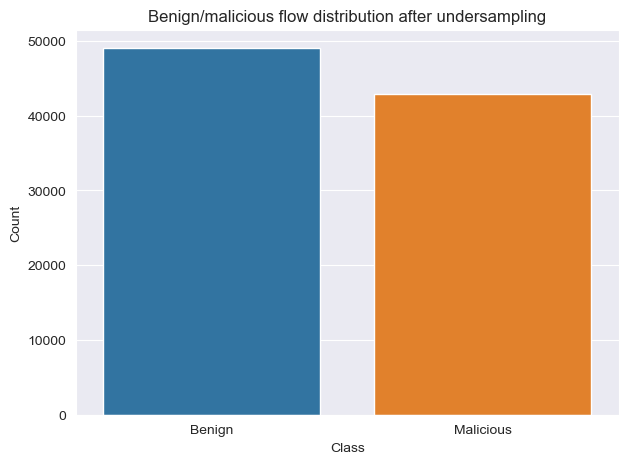

In [4]:
# Display the class distribution before undersampling
print("Class distribution before undersampling:")
print(df1['class'].value_counts())

# Separate benign flows (class 0) from the DataFrame
benign_flows = df1[df1['class'] == 0]

# Sample a subset of benign flows to achieve desired balance
undersampled_benign = benign_flows.sample(frac=0.1, random_state=42)  # Adjust the fraction as needed

# Concatenate undersampled benign flows with other classes if any
undersampled_df = pd.concat([undersampled_benign, df1[df1['class'] != 0]], ignore_index=True)

# Display the class distribution after undersampling
print("Class distribution after undersampling:")

class_counts = undersampled_df['class'].value_counts()
print(class_counts)

# Plotting
f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='class', data=undersampled_df, order = undersampled_df['class'].value_counts().index, ax=ax)

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Benign/malicious flow distribution after undersampling')
plt.xticks([0, 1], ['Benign', 'Malicious'])

plt.savefig(save_directory + method_name + "_class_distribution_after_undersampling.png")

plt.show()

df1 = undersampled_df


In [6]:
# Save dataset
undersampled_df.to_csv("./output/merged_dataset_method1_undersampled.csv", index = False)

Attack type distribution

attack_type
0    49033
1    22372
2    16553
3     3959
4       16
Name: count, dtype: int64


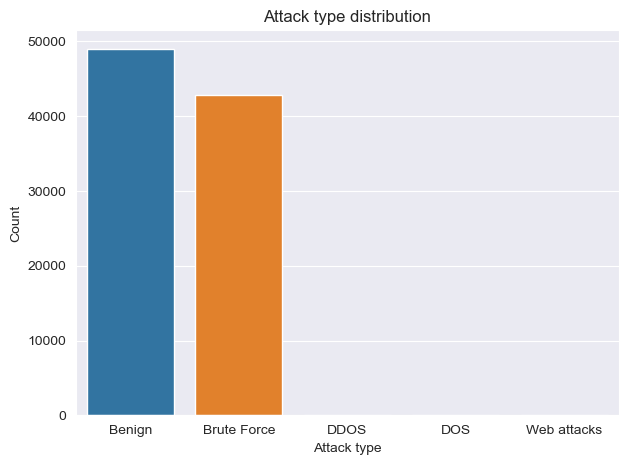

In [13]:
attack_counts = df1['attack_type'].value_counts()

f, ax = plt.subplots(figsize=(7, 5))
sns.countplot(x='class', data=df1, order = attack_counts.index, ax=ax)

print(attack_counts)

plt.xlabel('Attack type')
plt.ylabel('Count')
plt.title('Attack type distribution')
plt.xticks([0, 1, 2, 3, 4], ['Benign', 'Brute Force', 'DDOS', 'DOS', 'Web attacks'])

plt.savefig(save_directory + method_name + "_attack_type_distribution.png")

plt.show()

,attack_type
0,49033
1,22372
2,16553
3,3959
4,16


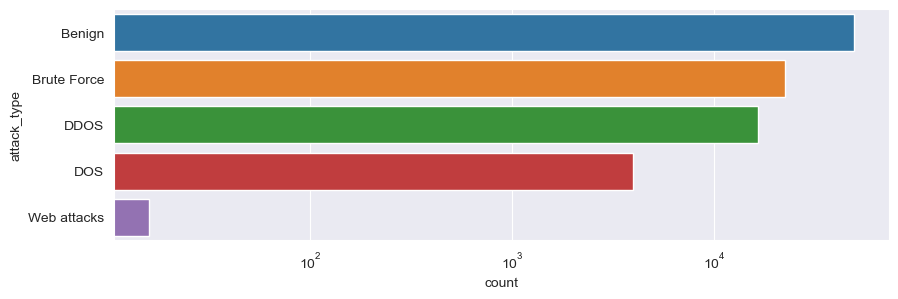

In [18]:
f, ax = plt.subplots(figsize=(10, 3))
ax.set(xscale='log')
sns.countplot(y='attack_type', data=df1, order = df1['attack_type'].value_counts().index, ax=ax)
plt.yticks([0, 1, 2, 3, 4], ['Benign', 'Brute Force', 'DDOS', 'DOS', 'Web attacks'])
plt.savefig(save_directory + method_name + "_attack_type_distribution_log.png")
df1.groupby('attack_type').agg({'attack_type':'first', 'attack_type':'count'}).rename_axis(None).sort_values('attack_type', ascending=False)